In [6]:
#导入相关包
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential
import glob, os, random

In [7]:
base_path = './Garbageclassification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


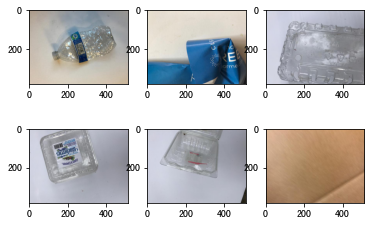

In [8]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 7 classes.
Found 251 images belonging to 7 classes.
{0: '.ipynb_checkpoints', 1: 'cardboard', 2: 'glass', 3: 'metal', 4: 'paper', 5: 'plastic', 6: 'trash'}


In [13]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    Conv2D(filters=32, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 300, 300, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)       

In [14]:
history=model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
143/143 [==============================] - 44s 309ms/step - loss: 1.5826 - acc: 0.3282 - val_loss: 1.3985 - val_acc: 0.3944
Epoch 2/10
143/143 [==============================] - 42s 292ms/step - loss: 1.4211 - acc: 0.4183 - val_loss: 1.3604 - val_acc: 0.3944
Epoch 3/10
143/143 [==============================] - 42s 292ms/step - loss: 1.3411 - acc: 0.4591 - val_loss: 1.3242 - val_acc: 0.4542
Epoch 4/10
143/143 [==============================] - 42s 295ms/step - loss: 1.2233 - acc: 0.5158 - val_loss: 1.4380 - val_acc: 0.4422
Epoch 5/10
143/143 [==============================] - 43s 298ms/step - loss: 1.1721 - acc: 0.5549 - val_loss: 1.1993 - val_acc: 0.5538
Epoch 6/10
143/143 [==============================] - 43s 297ms/step - loss: 1.1621 - acc: 0.5584 - val_loss: 1.1199 - val_acc: 0.5538
Epoch 7/10
143/143 [==============================] - 43s 298ms/step - loss: 1.2171 - acc: 0.5413 - val_loss: 1.3925 - val_acc: 0.4542
Epoch 8/10
143/143 [==============================] - 4

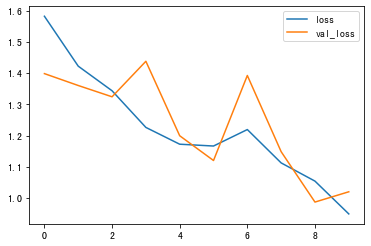

In [15]:
history.history.keys()
plt.plot(history.epoch,history.history.get('loss'),label='loss')   
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

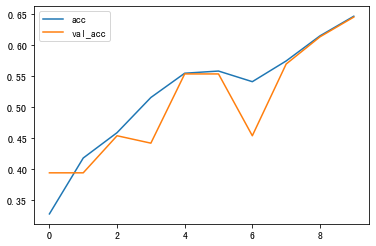

In [16]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')   
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

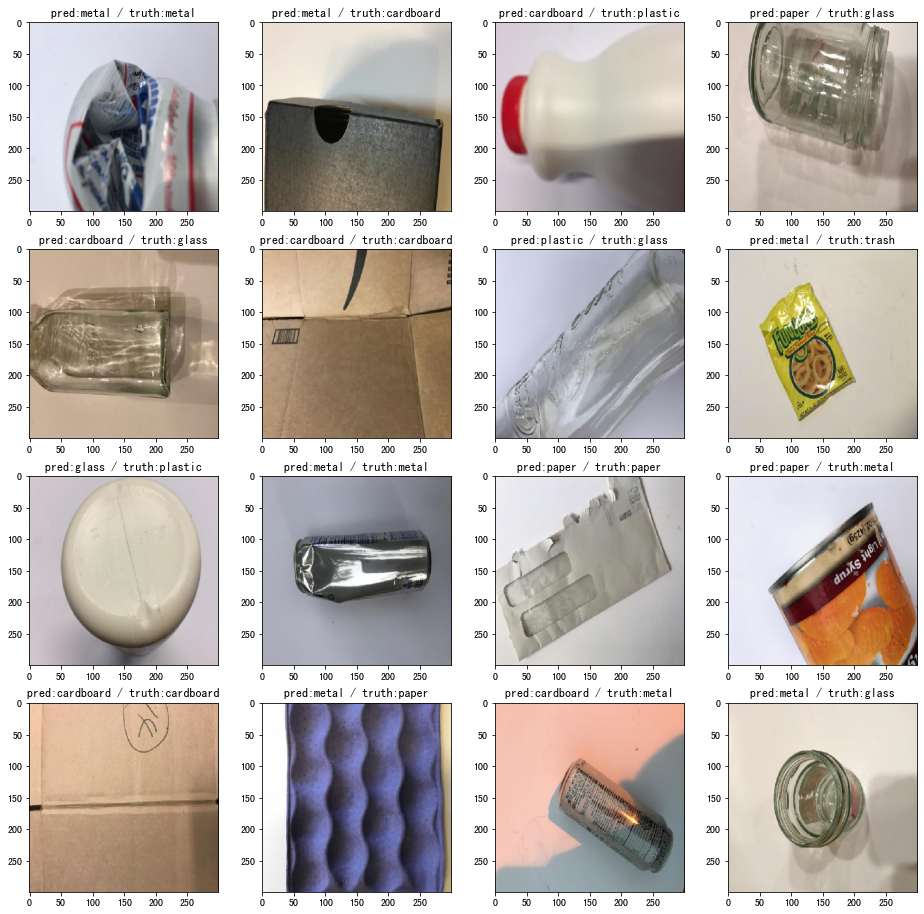

In [17]:
test_x, test_y = validation_generator.__getitem__(1)
preds = model.predict(test_x)
preds

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.title('pred:%s / truth:%s' %
              (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
img_path1 = './test.jpg'

In [20]:
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

In [21]:
p=model.predict(img[np.newaxis, ...])

In [22]:
labels[np.argmax(p[0])]

'cardboard'

In [23]:
model.save('garbage_model.h5')

# 模型重载

In [24]:
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

In [26]:
model = tf.keras.models.load_model('garbage_model.h5')

AttributeError: 'str' object has no attribute 'decode'

In [27]:
img_path1 = './test.jpg'

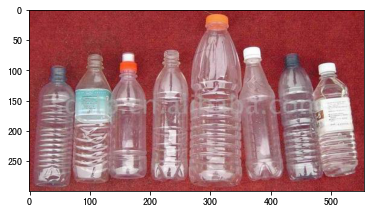

In [28]:
img=Image.open('./test.jpg')
plt.imshow(img)

In [29]:
img = image.load_img(img_path1, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

In [30]:
p=model.predict(img[np.newaxis, ...])

In [31]:
result=np.argmax(p[0])

In [32]:
# {0: '.ipynb_checkpoints', 1: 'cardboard', 2: 'glass', 3: 'metal', 4: 'paper', 5: 'plastic', 6: 'trash'}
if result == 1 :
    result='cardboard'
elif result == 2:
    result='glass'
elif result == 3:
    result='metal'
elif result == 4:
    result='paper'
elif result == 5:
    result='plastic'
elif result == 6:
    result='trash'

In [33]:
result

'cardboard'